   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0      0.0             0               0                  1              0   
1      1.0             1               0                  1              0   
2      0.0             0               0                  0              1   
3      1.5             1               0                  1              0   
4      0.0             0               0                  1              0   

   ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0              0              0            1 

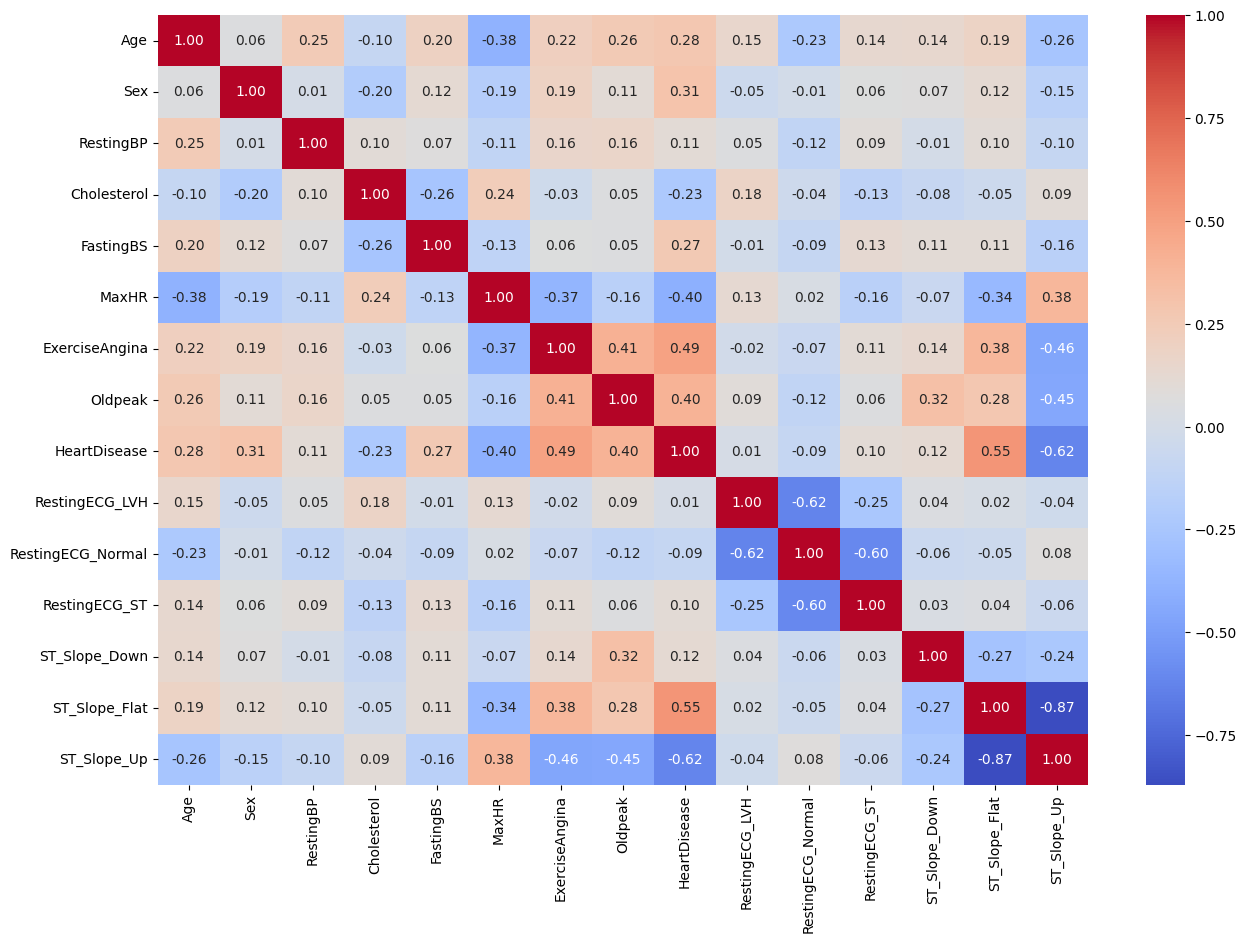

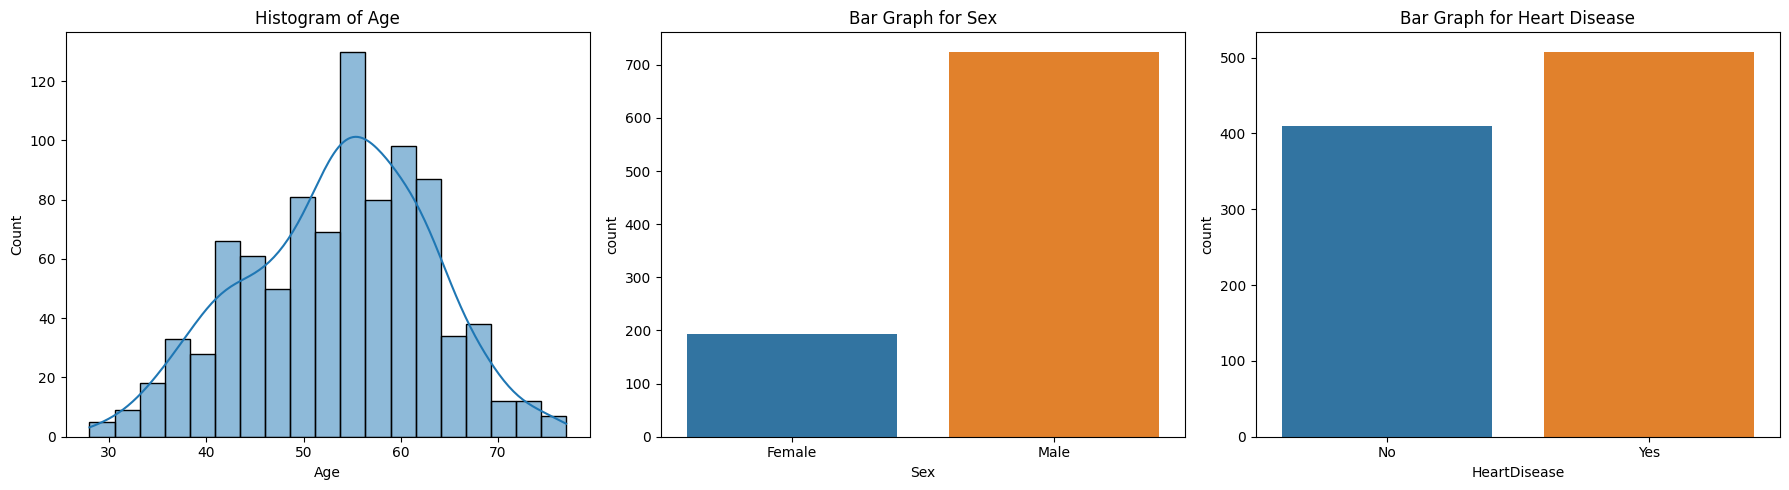

In [ ]:
# DATA UNDERSTANDING AND VISUALIZING FOR HEART DISEASE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
file_path = 'heart.csv'  
data = pd.read_csv(file_path)

# Initialize label encoder
label_encoder = LabelEncoder()

# Identify binary and multi-class categorical columns
binary_columns = [col for col in data.columns if data[col].nunique() == 2]
multiclass_columns = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() > 2]

# Apply label encoding to binary categorical columns
for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Apply one-hot encoding to multi-class categorical columns
data = pd.get_dummies(data, columns=multiclass_columns)

# Output the transformed dataset
print(data.head())
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))

# Generating a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
plt.figure(figsize=(18, 5))

# Histogram for Age
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Histogram of Age')

# Bar graph for Sex
plt.subplot(1, 3, 2)
sns.countplot(x='Sex', data=data)
plt.title('Bar Graph for Sex')
plt.xticks([0, 1], ['Female', 'Male'])  

# Bar graph for HeartDisease
plt.subplot(1, 3, 3)
sns.countplot(x='HeartDisease', data=data)
plt.title('Bar Graph for Heart Disease')
plt.xticks([0, 1], ['No', 'Yes'])  

# Displaying the plots
plt.tight_layout()
plt.show()


In [ ]:
# CALCULATING ACCURECIES USING BOTH THE MODELS

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('heart.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Split the dataset into features and target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print(f"KNN Accuracy: {knn_accuracy}")
print(f"Naive Bayes Accuracy: {nb_accuracy}")


KNN Accuracy: 0.6902173913043478
Naive Bayes Accuracy: 0.8478260869565217
